In [198]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from numpy.lib.function_base import quantile
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

Load The Dataset

In [199]:
dataset = pd.read_excel("Core_Swi_23.xlsx")

In [200]:
dataset.head()

,Depth,TOC,Calcite,Porosity,Swirr,Quartz,TOC1,Mineral,Wat_Per,TOC_Per,QC,PS,S2,TOC3,PS2,PS3,PS4
0,2773.88,4.389823,0.000000,7.059657,7.113304,40.625792,19.270550,40.625792,1.007599,0.621818,-40.625792,-0.053647,0.005060,0.092058,50.217483,0.084014,0.035721
1,2776.00,4.386618,6.364645,6.336578,9.364680,51.606889,19.242421,57.971534,1.477877,0.692269,-45.242245,-3.028102,0.008770,0.068213,59.340029,0.013945,0.055570
2,2778.13,3.445457,2.639268,4.697208,5.931133,41.462293,11.871172,44.101561,1.262693,0.733512,-38.823025,-1.233925,0.003518,0.070605,27.859765,0.011315,0.016524
3,2780.25,-0.310000,67.332860,6.321279,11.776418,4.069170,0.096100,71.402031,1.862980,-0.049041,63.263690,-5.455139,0.013868,-0.003989,74.442022,0.004510,0.087666
4,2782.48,4.059924,0.618621,5.686218,7.382626,38.091079,16.482983,38.709700,1.298337,0.713994,-37.472458,-1.696408,0.005450,0.091448,41.979219,0.015487,0.030992


# Perform outlier detection and feature scaling

Outlier_Detection

In [201]:
quantile1, quantile3 = dataset.quantile(.25), dataset.quantile(.75)
IQR= quantile3 - quantile1
lower_limit = quantile1 - (1.5 * IQR)
upper_limit = quantile3 + (1.5 * IQR)

detected_outliers = ((dataset < lower_limit) | (dataset > upper_limit)).any(axis = 1)

In [202]:
dataset=dataset.loc[~detected_outliers, :]
dataset

,Depth,TOC,Calcite,Porosity,Swirr,Quartz,TOC1,Mineral,Wat_Per,TOC_Per,QC,PS,S2,TOC3,PS2,PS3,PS4
1,2776.000000,4.386618,6.364645,6.336578,9.364680,51.606889,19.242421,57.971534,1.477877,0.692269,-45.242245,-3.028102,0.008770,0.068213,59.340029,1.394548e-02,0.055570
2,2778.130000,3.445457,2.639268,4.697208,5.931133,41.462293,11.871172,44.101561,1.262693,0.733512,-38.823025,-1.233925,0.003518,0.070605,27.859765,1.131458e-02,0.016524
4,2782.480000,4.059924,0.618621,5.686218,7.382626,38.091079,16.482983,38.709700,1.298337,0.713994,-37.472458,-1.696408,0.005450,0.091448,41.979219,1.548651e-02,0.030992
7,2788.740000,4.276764,11.000699,6.281519,9.531097,43.383418,18.290707,54.384117,1.517324,0.680849,-32.382719,-3.249578,0.009084,0.070497,59.869773,1.189419e-02,0.057062
8,2790.750000,3.794683,23.723766,5.169060,10.828240,33.071467,14.399616,56.795234,2.094818,0.734115,-9.347701,-5.659180,0.011725,0.061240,55.971825,7.884099e-04,0.060608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,3178.483333,4.891724,11.890476,5.415370,13.227773,42.452772,23.928964,54.343248,2.442635,0.903304,-30.562296,-7.812403,0.017497,0.081858,71.633282,2.995665e-04,0.094755
183,3180.443333,2.629111,22.198960,4.332587,7.528755,29.966589,6.912222,52.165549,1.737704,0.606822,-7.767629,-3.196168,0.005668,0.046534,32.618988,1.841448e-03,0.024558
186,3186.323333,2.553386,33.143510,2.437865,10.223862,21.050821,6.519779,54.194331,4.193777,1.047386,12.092689,-7.785997,0.010453,0.045087,24.924396,5.405942e-07,0.025482
187,3188.283333,1.578782,29.912994,2.458192,7.509209,3.277051,2.492552,33.190045,3.054769,0.642253,26.635943,-5.051017,0.005639,0.044288,18.459078,2.654647e-05,0.013861


Featrure_Scaling

In [203]:
Scale = StandardScaler()
dataset_scaled = Scale.fit_transform(dataset)
dataset = pd.DataFrame(dataset_scaled,columns=dataset.columns)
#scaled Values
dataset

,Depth,TOC,Calcite,Porosity,Swirr,Quartz,TOC1,Mineral,Wat_Per,TOC_Per,QC,PS,S2,TOC3,PS2,PS3,PS4
0,-1.857246,0.202326,-0.156255,1.853976,-0.262013,1.662856,0.066199,1.544004,-1.048218,-1.034877,-1.090079,0.873129,-0.387330,-0.804559,0.698518,2.539647,0.092312
1,-1.839194,-0.574062,-0.497105,0.273510,-1.314004,0.802985,-0.718179,0.348303,-1.284195,-0.868107,-0.761958,1.431715,-1.129718,-0.745316,-0.941327,1.940038,-1.029767
2,-1.802326,-0.067173,-0.681983,1.226984,-0.869287,0.517235,-0.227434,-0.116518,-1.245107,-0.947031,-0.692924,1.287729,-0.856549,-0.229293,-0.205827,2.890863,-0.614004
3,-1.749272,0.111704,0.267917,1.800895,-0.211025,0.965822,-0.035073,1.234741,-1.004959,-1.081058,-0.432760,0.804176,-0.342879,-0.747993,0.726113,2.072139,0.135200
4,-1.732236,-0.285977,1.432004,0.728408,0.186401,0.091766,-0.449126,1.442598,-0.371660,-0.865669,0.744683,0.053988,0.030429,-0.977189,0.523065,-0.458976,0.237078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.553890,0.619000,0.349326,0.965868,0.921585,0.886939,0.564897,1.231217,0.009768,-0.181526,-0.339708,-0.616382,0.846383,-0.466724,1.338889,-0.570388,1.218379
116,1.570502,-1.247485,1.292493,-0.078009,-0.824515,-0.171409,-1.245864,1.043483,-0.763282,-1.380395,0.825449,0.820804,-0.825747,-1.341263,-0.693413,-0.218979,-0.798890
117,1.620336,-1.309953,2.293856,-1.904651,0.001228,-0.927123,-1.287624,1.218380,1.930128,0.401093,1.840615,-0.608161,-0.149425,-1.377095,-1.094234,-0.638539,-0.772328
118,1.636948,-2.113927,1.998282,-1.885055,-0.830504,-2.433654,-1.716163,-0.592356,0.681055,-1.237124,2.583999,0.243329,-0.829902,-1.396886,-1.431020,-0.632612,-1.106285


. Remove collinear features using the Pearson Correlation Coefficient
threshold of 90% (10 points)

In [204]:
corr_matrix = dataset.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
correlated_columns = corr_matrix.where(mask).stack().reset_index()
correlated_columns.columns = ['attribute1', 'attribute2', 'correlated_values']
threshold = (correlated_columns['correlated_values'] > 0.9)
dropped_features = correlated_columns[threshold & (correlated_columns['attribute2'] != 'target')]['attribute2']
dropped_features = dropped_features.unique().tolist()
dataset = dataset.drop(dropped_features, axis=1)
dataset

,Depth,TOC,Calcite,Porosity,Swirr,Quartz,Mineral,Wat_Per,TOC_Per,QC,TOC3,PS3
0,-1.857246,0.202326,-0.156255,1.853976,-0.262013,1.662856,1.544004,-1.048218,-1.034877,-1.090079,-0.804559,2.539647
1,-1.839194,-0.574062,-0.497105,0.273510,-1.314004,0.802985,0.348303,-1.284195,-0.868107,-0.761958,-0.745316,1.940038
2,-1.802326,-0.067173,-0.681983,1.226984,-0.869287,0.517235,-0.116518,-1.245107,-0.947031,-0.692924,-0.229293,2.890863
3,-1.749272,0.111704,0.267917,1.800895,-0.211025,0.965822,1.234741,-1.004959,-1.081058,-0.432760,-0.747993,2.072139
4,-1.732236,-0.285977,1.432004,0.728408,0.186401,0.091766,1.442598,-0.371660,-0.865669,0.744683,-0.977189,-0.458976
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.553890,0.619000,0.349326,0.965868,0.921585,0.886939,1.231217,0.009768,-0.181526,-0.339708,-0.466724,-0.570388
116,1.570502,-1.247485,1.292493,-0.078009,-0.824515,-0.171409,1.043483,-0.763282,-1.380395,0.825449,-1.341263,-0.218979
117,1.620336,-1.309953,2.293856,-1.904651,0.001228,-0.927123,1.218380,1.930128,0.401093,1.840615,-1.377095,-0.638539
118,1.636948,-2.113927,1.998282,-1.885055,-0.830504,-2.433654,-0.592356,0.681055,-1.237124,2.583999,-1.396886,-0.632612


In [205]:
X = dataset.drop('Swirr', axis=1)
Y = dataset.Swirr

# Without Applying PCA

In [215]:
X_columns = ['Depth', 'TOC', 'Calcite', 'Porosity', 'Quartz', 'Mineral', 'Wat_Per',
       'TOC_Per', 'QC', 'TOC3', 'PS3']
for i in X_columns:
  X[i] = X[i].replace(np.NaN, X[i].mean())

In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.2)

SVR with RBF kernel

In [217]:
from sklearn.svm import SVR
SVR_RBF = SVR(kernel='rbf')
SVR_RBF = SVR_RBF.fit(X_train, y_train)
print("SVR with RBF kernel train score: ", SVR_RBF.score(X_train, y_train))
print("SVR with RBF kernel test score: ", SVR_RBF.score(X_test, y_test))

SVR with RBF kernel train score:  0.9854125150622807
SVR with RBF kernel test score:  0.9618094594242808


In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.2)

Develop Different Regression Methods to Predict Swirr.

SVR with Polynomial Kernel of degree 2

In [219]:
SVR_poly = SVR(kernel='poly', degree=2)
SVR_poly = SVR_poly.fit(X_train, y_train)
print("SVR with RBF kernel train score: ", SVR_poly.score(X_train, y_train))
print("SVR with RBF kernel test score: ",SVR_poly.score(X_test, y_test))

SVR with RBF kernel train score:  0.45115574924915247
SVR with RBF kernel test score:  0.14753100664091756


Gradient Boosting Regressor

In [220]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR = GBR.fit(X_train, y_train)
print("GBR train score:", GBR.score(X_train, y_train))
print("GBR test score:", GBR.score(X_test, y_test))

GBR train score: 0.9997964219019623
GBR test score: 0.9213496532707647


Random Forest Regressor

In [221]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR = RFR.fit(X_train, y_train)
print("GBR train score:", RFR.score(X_train, y_train))
print("GBR test score:", RFR.score(X_test, y_test))

GBR train score: 0.9894224635048883
GBR test score: 0.8812833244767481


Hyperparameter optimization of Support Vector Regressor with RBF

In [222]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
parameters_for_optimization = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,],'kernel': ['rbf']}
svr_rbf = GridSearchCV(SVR(),parameters_for_optimization,refit=True,verbose=2, scoring='neg_mean_squared_error')
#train the model
svr_rbf.fit(X_train,y_train)
#make Predictions
grid_preditions = svr_rbf.predict(X_test)
Mean_sqaure_error_svr_rbf = mean_squared_error(grid_preditions, y_test)
Mean_absolute_error_svr_rbf = mean_absolute_error(grid_preditions, y_test)
R2_SVR_RBF = r2_score(grid_preditions, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01,

In [223]:
print("Best Parameters for SVR RBF model: ", svr_rbf.best_params_)
print("Mean Square Error of SVR RBF : ", Mean_sqaure_error_svr_rbf)
print("Mean Absoute Error of SVR RBF : ", Mean_absolute_error_svr_rbf)

Best Parameters for SVR RBF model:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Square Error of SVR RBF :  0.006813007973953002
Mean Absoute Error of SVR RBF :  0.06629889207034335


Hyperparameter optimization of Support Vector Regressor with Poly

In [224]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
parameters_for_optimizations = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,],'kernel': ['poly']}
svr_poly = GridSearchCV(SVR(),parameters_for_optimizations,refit=True,verbose=2, scoring='neg_mean_squared_error')
#train the model
svr_poly.fit(X_train,y_train)
#make Predictions
grid_preditions_poly = svr_poly.predict(X_test)
Mean_sqaure_error_svr_poly = mean_squared_error(grid_preditions_poly, y_test)
Mean_absolute_error_svr_poly = mean_absolute_error(grid_preditions_poly, y_test)
R2_SVR_poly = r2_score(grid_preditions_poly, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, 

In [225]:
print("Best Parameters for SVR RBF model: ", svr_poly.best_params_)
print("Mean Square Error of SVR RBF : ", Mean_sqaure_error_svr_poly)

Best Parameters for SVR RBF model:  {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
Mean Square Error of SVR RBF :  0.30535216860545605


Hyperparameter Optimization for Gradient Boosting Regression

In [226]:
parameters_for_GBR = {
    "n_estimators" : [5, 50,100],
    "max_depth" : [1,3,5],
    "learning_rate" : [0.001, 0.01, 0.1]
}
GRB_optimization = GridSearchCV(GradientBoostingRegressor(),parameters_for_GBR,  scoring='neg_mean_squared_error')
#train the model
GRB_optimization.fit(X_train,y_train)
#make Predictions
GRB_grid_preditions = GRB_optimization.predict(X_test)
Mean_sqaure_error_GRB = mean_squared_error(GRB_grid_preditions, y_test)
Mean_absolute_error_GRB= mean_absolute_error(GRB_grid_preditions, y_test)
R2_SVR_GBR = r2_score(GRB_grid_preditions, y_test)

In [227]:
print("Best Parameters for GRB model: ", GRB_optimization.best_params_)
print("Mean Square Error of GRB Model: ", Mean_sqaure_error_GRB)

Best Parameters for GRB model:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Mean Square Error of GRB Model:  0.04912816054449708


Hyperparameter optimation for Random Forest Estimator

In [228]:
parameters_for_RFR = {"n_estimators" : [5, 50,100],"max_depth" : [1,3,5], "max_features" : ['log2', 'sqrt']}
RFR_optimization = GridSearchCV(RandomForestRegressor(),parameters_for_RFR,  scoring='neg_mean_squared_error')
#train the model
RFR_optimization.fit(X_train,y_train)
#make Predictions
RFR_grid_preditions = RFR_optimization.predict(X_test)
Mean_sqaure_error_RFR = mean_squared_error(RFR_grid_preditions, y_test)
Mean_absolute_error_RFR= mean_absolute_error(RFR_grid_preditions, y_test)
R2_SVR_RFR = r2_score(RFR_grid_preditions, y_test)

In [229]:
print("Best Parameters for RFR model: ", GRB_optimization.best_params_)
print("Mean Square Error of RFR Model: ", Mean_sqaure_error_RFR)

Best Parameters for RFR model:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Mean Square Error of RFR Model:  0.08768484120897872


In [230]:
R2_models_without_PCA = [R2_SVR_poly, R2_SVR_RBF, R2_SVR_GBR, R2_SVR_RFR]

# Apply PCA with an explained variance threshold of 85%

In [239]:
pca = PCA(n_components=0.85)
principalComponents = pca.fit_transform(X)
pca_dataset = pd.DataFrame(data = principalComponents
             , columns = ["Principal_Component {}".format(i+1) for i in range(principalComponents.shape[1])])
pca_dataset.head()


,Principal_Component 1,Principal_Component 2,Principal_Component 3,Principal_Component 4
0,-1.704983,-4.008267,-0.884389,-0.829937
1,-0.612561,-2.939409,0.311454,-1.020661
2,-1.407499,-3.099563,1.140717,-1.202390
3,-0.906482,-3.487086,-0.528962,-1.024327
4,1.378620,-1.733482,-1.478825,-1.440519


In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_dataset, Y, random_state=0, test_size=0.2)

# Develop Different Regression Methods to Predict Swirr.

## Support Vector Regressor 

SVR with RBF kernel

In [242]:
from sklearn.svm import SVR
SVR_RBF = SVR(kernel='rbf')
SVR_RBF = SVR_RBF.fit(X_train, y_train)
print("SVR with RBF kernel train score: ", SVR_RBF.score(X_train, y_train))
print("SVR with RBF kernel test score: ", SVR_RBF.score(X_test, y_test))

SVR with RBF kernel train score:  0.900225721078615
SVR with RBF kernel test score:  0.769928680111293


SVR with Polynomial Kernel of degree 2

In [243]:
SVR_poly = SVR(kernel='poly', degree=2)
SVR_poly = SVR_poly.fit(X_train, y_train)
print("SVR with RBF kernel train score: ", SVR_poly.score(X_train, y_train))
print("SVR with RBF kernel test score: ",SVR_poly.score(X_test, y_test))

SVR with RBF kernel train score:  0.28535672300787784
SVR with RBF kernel test score:  -0.21136016795385726


Gradient Boosting Regressor

In [244]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR = GBR.fit(X_train, y_train)
print("GBR train score:", GBR.score(X_train, y_train))
print("GBR test score:", GBR.score(X_test, y_test))

GBR train score: 0.9951135873043291
GBR test score: 0.6907543264878256


Random Forest Regressor

In [245]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR = RFR.fit(X_train, y_train)
print("GBR train score:", RFR.score(X_train, y_train))
print("GBR test score:", RFR.score(X_test, y_test))

GBR train score: 0.967558739025729
GBR test score: 0.6979622132178096


Hyperparameter optimization of Support Vector Regressor with RBF

In [246]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
parameters_for_optimization = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,],'kernel': ['rbf']}
svr_rbf = GridSearchCV(SVR(),parameters_for_optimization,refit=True,verbose=2, scoring='neg_mean_squared_error')
#train the model
svr_rbf.fit(X_train,y_train)
#make Predictions
grid_preditions = svr_rbf.predict(X_test)
Mean_sqaure_error_svr_rbf = mean_squared_error(grid_preditions, y_test)
Mean_absolute_error_svr_rbf = mean_absolute_error(grid_preditions, y_test)
R2_SVR_RBF = r2_score(grid_preditions, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01,

In [247]:
print("Best Parameters for SVR RBF model: ", svr_rbf.best_params_)
print("Mean Square Error of SVR RBF : ", Mean_sqaure_error_svr_rbf)
print("Mean Absoute Error of SVR RBF : ", Mean_absolute_error_svr_rbf)

Best Parameters for SVR RBF model:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Square Error of SVR RBF :  0.14067107319012806
Mean Absoute Error of SVR RBF :  0.3093080704918303


Hyperparameter optimization of Support Vector Regressor with Poly

In [248]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
parameters_for_optimizations = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,],'kernel': ['poly']}
svr_poly = GridSearchCV(SVR(),parameters_for_optimizations,refit=True,verbose=2, scoring='neg_mean_squared_error')
#train the model
svr_poly.fit(X_train,y_train)
#make Predictions
grid_preditions_poly = svr_poly.predict(X_test)
Mean_sqaure_error_svr_poly = mean_squared_error(grid_preditions_poly, y_test)
Mean_absolute_error_svr_poly = mean_absolute_error(grid_preditions_poly, y_test)
R2_SVR_poly = r2_score(grid_preditions_poly, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, 

In [249]:
print("Best Parameters for SVR RBF model: ", svr_poly.best_params_)
print("Mean Square Error of SVR RBF : ", Mean_sqaure_error_svr_poly)

Best Parameters for SVR RBF model:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Mean Square Error of SVR RBF :  0.4248392751145475


Hyperparameter Optimization for Gradient Boosting Regression

In [250]:
parameters_for_GBR = {
    "n_estimators" : [5, 50,100],
    "max_depth" : [1,3,5],
    "learning_rate" : [0.001, 0.01, 0.1]
}
GRB_optimization = GridSearchCV(GradientBoostingRegressor(),parameters_for_GBR,  scoring='neg_mean_squared_error')
#train the model
GRB_optimization.fit(X_train,y_train)
#make Predictions
GRB_grid_preditions = GRB_optimization.predict(X_test)
Mean_sqaure_error_GRB = mean_squared_error(GRB_grid_preditions, y_test)
Mean_absolute_error_GRB= mean_absolute_error(GRB_grid_preditions, y_test)
R2_SVR_GBR = r2_score(GRB_grid_preditions, y_test)

In [251]:
print("Best Parameters for GRB model: ", GRB_optimization.best_params_)
print("Mean Square Error of GRB Model: ", Mean_sqaure_error_GRB)

Best Parameters for GRB model:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Mean Square Error of GRB Model:  0.194909264717568


Hyperparameter optimation for Random Forest Estimator

In [252]:
parameters_for_RFR = {"n_estimators" : [5, 50,100],"max_depth" : [1,3,5], "max_features" : ['log2', 'sqrt']}
RFR_optimization = GridSearchCV(RandomForestRegressor(),parameters_for_RFR,  scoring='neg_mean_squared_error')
#train the model
RFR_optimization.fit(X_train,y_train)
#make Predictions
RFR_grid_preditions = RFR_optimization.predict(X_test)
Mean_sqaure_error_RFR = mean_squared_error(RFR_grid_preditions, y_test)
Mean_absolute_error_RFR= mean_absolute_error(RFR_grid_preditions, y_test)
R2_SVR_RFR = r2_score(RFR_grid_preditions, y_test)

In [253]:
print("Best Parameters for RFR model: ", GRB_optimization.best_params_)
print("Mean Square Error of RFR Model: ", Mean_sqaure_error_RFR)

Best Parameters for RFR model:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Mean Square Error of RFR Model:  0.14076727005938824


Compare the performances of the optimized SVR(kernel=poly,degree=2), SVR(Kernel=RBF), Gradient Boosting, and Random Forest regressors in terms of root mean squared error (RMSE) and mean absolute error (MAE)

In [254]:
RMSE_SVR_poly = np.sqrt(Mean_sqaure_error_svr_poly)
RMSE_SVR_rbf = np.sqrt(Mean_sqaure_error_svr_rbf)
RMSE_GBR =np.sqrt(Mean_sqaure_error_GRB)
RMSE_RFR = np.sqrt(Mean_sqaure_error_RFR)
RMSE_of_all_models = [RMSE_SVR_poly, RMSE_SVR_rbf, RMSE_GBR, RMSE_RFR]

MAE = [Mean_absolute_error_svr_poly, Mean_absolute_error_svr_rbf, Mean_absolute_error_GRB, Mean_absolute_error_RFR]

In [255]:
#Bar plot
import matplotlib.pyplot as plt

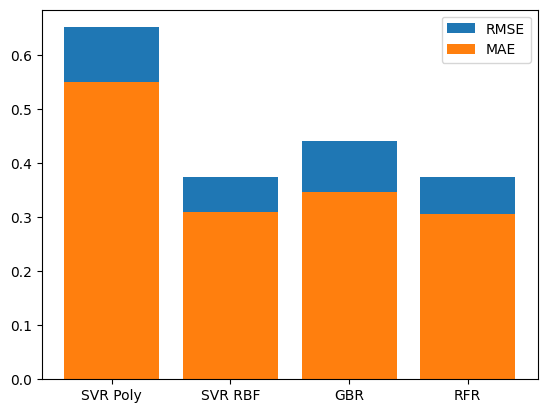

In [256]:
model_used = ["SVR Poly","SVR RBF", "GBR", "RFR"]
figure, ax = plt.subplots()
ax.bar(model_used, RMSE_of_all_models, label = 'RMSE')
ax.bar(model_used, MAE, label = 'MAE')
ax.legend()

The plot clearly depicts that the Support Vector Regressor with RBF kernel has minimum root mean sqaure ehich indicates  that the predicted outcomes of the model are closer to the actual ones. The second model with minimum RMSE is Random Forest Regressor. These too models provide best results.

 Compare the performances in terms of R-squared (R2) score

Comaprsion plots clearlu illustrates that the models withot using PCA provides more accurate results. A high R-squared (R2) value is desirable. Model without using dimensionality reduction contains all the information hidden in the data. It has predicted a value cloest to 1 for R2 indicates that all of the variation in the dependent variable can be determined from the independent variable(s), whereas while using PCA a value of 0 and below 0 shows that not all of the variation in the based variable can be determined from the independent variable(s). Consequently, a greater R2 value indicates a superior model fit to the data.


Text(0.5, 1.0, 'With PCA')

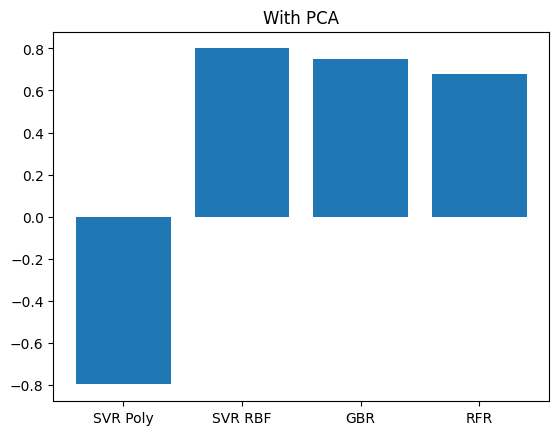

In [259]:
R2_models = [R2_SVR_poly, R2_SVR_RBF, R2_SVR_GBR, R2_SVR_RFR]
plt.bar(model_used, R2_models)
plt.title("With PCA")


Text(0.5, 1.0, 'Without PCA')

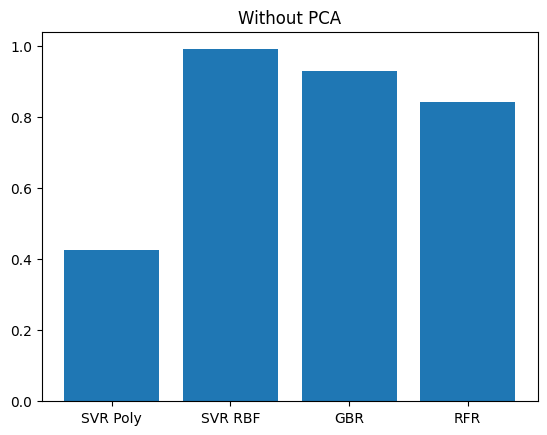

In [261]:
plt.bar(model_used, R2_models_without_PCA)
plt.title("Without PCA")


The graph clearly depicts that the Suppot vector Regressor with Poly kerneal has minimum absolute error. So it produces more accurate predictions on the testing sets. Random FOrest Regressor aslo has lowest MAE than Gradient boosting and SVR with RBF. 

 Compare the True vs. Predicted

Text(0.5, 1.0, 'Gradient Boosting')

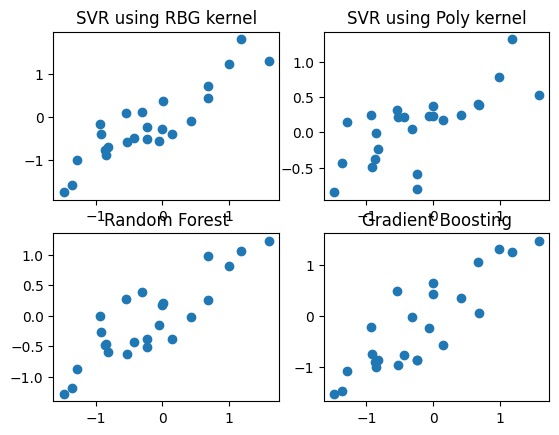

In [197]:
figure, ax = plt.subplots(2,2)
ax[0,0].scatter(y_test,grid_preditions)
ax[0,0].set_title("SVR using RBG kernel")
ax[0,1].scatter(y_test,grid_preditions_poly)
ax[0,1].set_title("SVR using Poly kernel")
ax[1,0].scatter(y_test,RFR_grid_preditions)
ax[1,0].set_title("Random Forest")
ax[1,1].scatter(y_test,GRB_grid_preditions)
ax[1,1].set_title("Gradient Boosting")

